In [117]:
import brainsss
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid


In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
analyis_path = os.path.join(dataset_path, '20220425_dataset_comparisons')

In [13]:
os.listdir(analyis_path)

['gcamp6f_paper.npy', 'gcamp8s.npy', 'gcamp6f_new.npy']

In [145]:
load_file = os.path.join(analyis_path, 'gcamp8s.npy')
brain_data = np.load(load_file)
brain_data.shape

(3, 10, 314, 146, 91)

In [103]:
corr_map = np.mean(brain_data,axis=1)

In [5]:
corr_map = brain_data[:,0,:,:,:]#np.mean(brain_data,axis=1)

In [104]:
corr_map = np.rollaxis(corr_map,0,4)

corr_map = corr_map[:,:,::-1,:]

# thresh_map = corr_map.copy()
# thresh=0.02
# thresh_map[np.where(corr_map<thresh)] = 0

# #plt.figure(figsize=(10,10))
# #plt.imshow(np.swapaxes(thresh_map[:,:,64,:]*25,0,1))

# corr_map = thresh_map

In [9]:
atlas = brainsss.load_roi_atlas()

In [10]:
explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas)

In [111]:
input_canvas = np.zeros((500,500,3))
data_to_plot = np.nan_to_num(corr_map[...,2])
vmax = np.max(data_to_plot)

explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
                                                    roi_masks,
                                                    roi_contours,
                                                    data_to_plot,
                                                    input_canvas,
                                                    vmax=vmax,
                                                    cmap='hot')

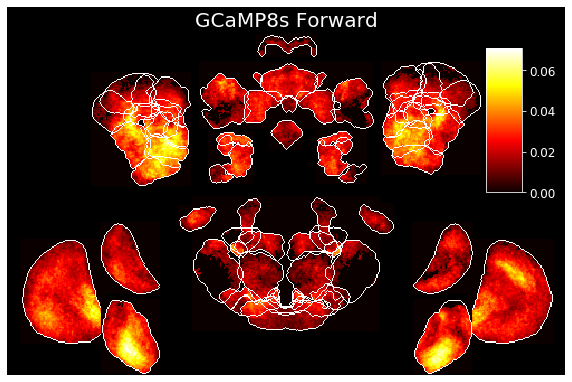

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(explosion_map[170:,:])
plt.title('GCaMP8s Forward',color='w',y=.93,fontsize=20)
plt.axis('off')

cax = fig.add_axes([0.79, 0.5, 0.05, 0.2])
cmap = matplotlib.cm.hot
norm = matplotlib.colors.Normalize(vmin=0, vmax=vmax)
cb = matplotlib.colorbar.ColorbarBase(ax=cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

cb.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white',fontsize=12);
cb.outline.set_edgecolor('white')
#cb.set_label('Some Units')


save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [150]:
maps = []
#vmaxs = []
for fly in range(10):
    print(fly)
    corr_map = brain_data[:,fly,:,:,:]
    corr_map = np.rollaxis(corr_map,0,4)
    corr_map = corr_map[:,:,::-1,:]
    #data_to_plot = np.nan_to_num(corr_map[...,0])

    
    input_canvas = np.zeros((500,500,3))
    data_to_plot = np.nan_to_num(corr_map[...,2])
    #vmax = np.max(data_to_plot)
    vmax=.1

    explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
                                                        roi_masks,
                                                        roi_contours,
                                                        data_to_plot,
                                                        input_canvas,
                                                        vmax=vmax,
                                                        cmap='hot')
    maps.append(explosion_map)

0
1
2
3
4
5
6
7
8
9


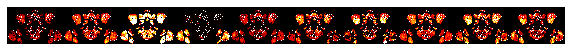

In [151]:
fig = plt.figure(figsize=(10,10))

grid = ImageGrid(fig, 111, nrows_ncols=(1, 10), axes_pad=0,aspect=False)

for fly_num, ax in enumerate(grid):
    ax.imshow(maps[fly_num][170:,:])
    ax.axis('off')
    
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr + 'fwd')
plt.savefig(fname,dpi=300,bbox_inches='tight')

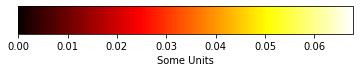

In [25]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = matplotlib.cm.hot
norm = matplotlib.colors.Normalize(vmin=0, vmax=vmax)

cb = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb.set_label('Some Units')
fig.show()

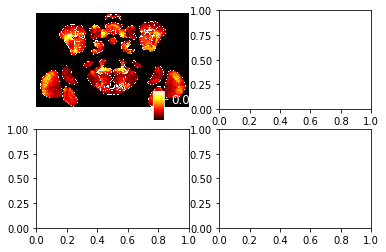

In [66]:
fig, axs = plt.subplots(2, 2)

axs[0,0].imshow(explosion_map[190:,:])
#plt.title('GCaMP8s Right Turn Correlation')
axs[0,0].axis('off')

cax = fig.add_axes([0.79/2, 0.5, 0.05/2, 0.2/2])
cmap = matplotlib.cm.hot
norm = matplotlib.colors.Normalize(vmin=0, vmax=vmax)
cb = matplotlib.colorbar.ColorbarBase(ax=cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

cb.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white',fontsize=12);
cb.outline.set_edgecolor('white')
#cb.set_label('Some Units')




(-0.5, 499.5, 309.5, -0.5)

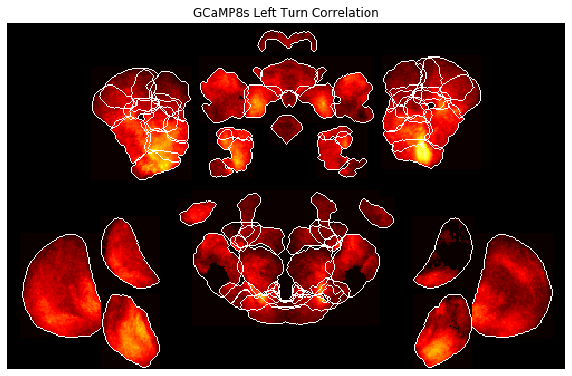

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(explosion_map[190:,:])
plt.title('GCaMP8s Left Turn Correlation')
plt.axis('off')